In [25]:
#Se cargan las librearias 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [ ]:
#Se carga el fondo que tiene el panel y la imagen que se va a proyectar
fondo = Image.open("fondoPerspectiva.jpg")
imagen = Image.open("fox.png")

fondo
imagen

In [28]:
#Se obtienen los 4 puntos de ambas imagenes
puntosFondo = np.array([[0,0],[0,0],[0,0],[0,0]],np.int32)
puntosImagen = np.array([[0,0],[0,0],[0,0],[0,0]],np.int32)

imagenUL = [0,0]
imagenUR = [imagen.size[0],0]
imagenDL = [0,imagen.size[1]]
imagenDR = [imagen.size[0],imagen.size[1]]

fondoUL = [1235,85]
fondoUR = [1518,17]
fondoDL = [1610,361]
fondoDR = [1981,222]

puntosFondo[0] = fondoUL
puntosFondo[1] = fondoUR
puntosFondo[2] = fondoDL
puntosFondo[3] = fondoDR

puntosImagen[0] = imagenUL
puntosImagen[1] = imagenUR
puntosImagen[2] = imagenDL
puntosImagen[3] = imagenDR


In [29]:
from math import floor


def perspectiva(img, bg, matrizP):
    #Se obtienen las dimensiones del fondo, se asume que el fondo es mas grande que la imagen
    
    maxwidth = bg.size[0]
    maxheight = bg.size[1]

    
    img = np.array(img)
    #Se crea una matriz con las dimensiones de la imagen y el fondo
    nueva = np.zeros((maxheight, maxwidth, 3), np.uint8)
    
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            nuevoIndice = np.matmul(matrizP, np.array([j,i,1]))
            nueva[ floor(nuevoIndice[1]) ][ floor(nuevoIndice[0])][0] = img[i][j][0]
            nueva[ floor(nuevoIndice[1]) ][ floor(nuevoIndice[0])][1] = img[i][j][1]
            nueva[ floor(nuevoIndice[1]) ][ floor(nuevoIndice[0])][2] = img[i][j][2]
    
    return Image.fromarray(nueva)


[1235 1518 1981 1610   85   17  222  361]
[[      0       0       1       0       0       0       0       0]
 [    320       0       1       0       0       0 -485760       0]
 [    320     427       1       0       0       0 -633920 -845887]
 [      0     427       1       0       0       0       0 -687470]
 [      0       0       0       0       0       1       0       0]
 [      0       0       0     320       0       1   -5440       0]
 [      0       0       0     320     427       1  -71040  -94794]
 [      0       0       0       0     427       1       0 -154147]]
[ 1.02316145e+00  9.87848785e-01  1.21284748e+03 -3.23749379e-01
  5.64311467e-01  1.02800498e+02  2.19500695e-07  3.64581835e-06]
[[ 1.02316145e+00  9.87848785e-01  1.21284748e+03]
 [-3.23749379e-01  5.64311467e-01  1.02800498e+02]
 [ 2.19500695e-07  3.64581835e-06  1.00000000e+00]]


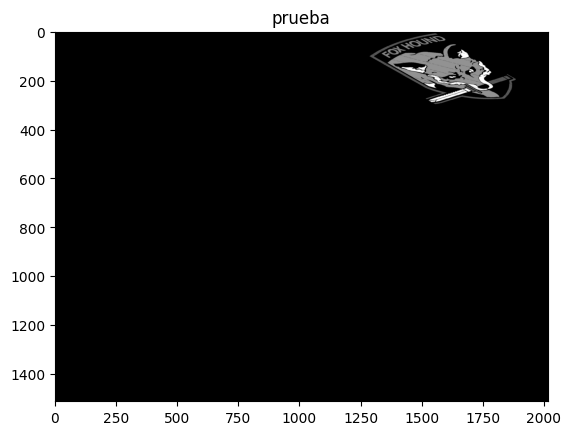

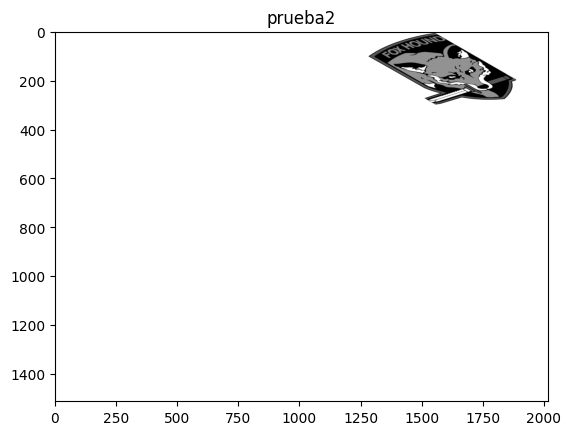

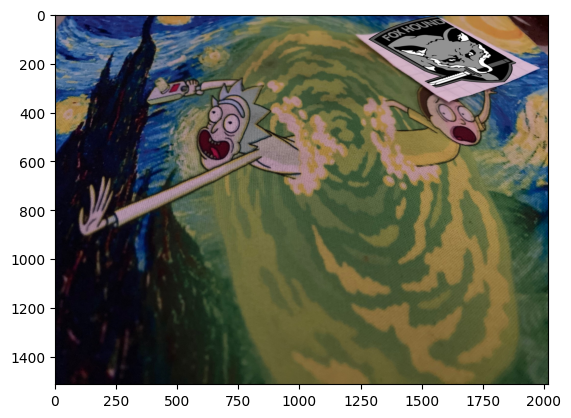

In [30]:
#Usando la represntación matricial de la perspectiva se pueden obtener los coeficientes de la matriz de transformación +

resultado = np.array([fondoUL[0], fondoUR[0], fondoDR[0], fondoDL[0], fondoUL[1], fondoUR[1],fondoDR[1],fondoDL[1]])
print(resultado)

matrix = np.array([[ imagenUL[0], imagenUL[1],  1, 0, 0 ,0, -imagenUL[0]*fondoUL[0], -imagenUL[1]*fondoUL[0]],
                    [imagenUR[0], imagenUR[1],  1, 0, 0 ,0, -imagenUR[0]*fondoUR[0], -imagenUR[1]*fondoUR[0]],
                    [imagenDR[0], imagenDR[1],  1, 0, 0 ,0, -imagenDR[0]*fondoDR[0], -imagenDR[1]*fondoDR[0]],
                    [imagenDL[0], imagenDL[1],  1, 0, 0 ,0, -imagenDL[0]*fondoDL[0], -imagenDL[1]*fondoDL[0]],
                    [0, 0 , 0, imagenUL[0], imagenUL[1], 1, -imagenUL[0]*fondoUL[1], -imagenUL[1]*fondoUL[1]],
                    [0, 0 , 0, imagenUR[0], imagenUR[1], 1, -imagenUR[0]*fondoUR[1], -imagenUR[1]*fondoUR[1]],
                    [0, 0 , 0, imagenDR[0], imagenDR[1], 1, -imagenDR[0]*fondoDR[1], -imagenDR[1]*fondoDR[1]],
                    [0, 0 , 0, imagenDL[0], imagenDL[1], 1, -imagenDL[0]*fondoDL[1], -imagenDL[1]*fondoDL[1]]])

print(matrix)

a = np.matmul(np.matmul(np.linalg.inv(np.matmul(matrix.transpose(),matrix)),matrix.transpose()), resultado)


print(a)

#Se obtiene la matriz de transformacion
matrizPerspectiva = np.array(([a[0], a[1], a[2]], [a[3], a[4], a[5]], [a[6], a[7], 1]))

print(matrizPerspectiva)



prueba = perspectiva(imagen, fondo, matrizPerspectiva)
plt.title("prueba")
plt.imshow(prueba)
plt.show()

#imagen = cv2.cvtColor(np.array(imagen), cv2.COLOR_RGB2BGR)
imagen = cv2.warpPerspective(np.array(imagen) , matrizPerspectiva, (fondo.size[0],fondo.size[1]))

#se muestra la imagen
plt.title("prueba2")
plt.imshow(Image.fromarray(imagen))
plt.show()
#Se aplica la transformacion a la imagen
#imagen = cv2.warpPerspective(np.array(imagen),matrizPerspectiva,(fondo.size[0],fondo.size[1]))

#se pone la imagen en el fondo
fondo.paste(Image.fromarray(imagen),(0,0),Image.fromarray(imagen))

plt.imshow(fondo)



